# Train your first classification tree

you'll work with the Wisconsin Breast Cancer Dataset from the UCI machine learning repository. You'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (`radius_mean`) and its mean number of concave points (`concave points_mean`).

In [10]:
import pandas as pd
SEED = 42
from sklearn.model_selection import train_test_split
df_bc = pd.read_csv("dataset/wbc.csv")
df = df_bc[['radius_mean', 'concave points_mean']]
# print(list(df.columns))
X = df.values
y = df_bc['diagnosis'].map({'B': 0, 'M': 1}).values
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
# df_bc['diagnosis'].unique()



In [11]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth = 6, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 0 0 1 0]


# Evaluate the classification tree

Now that you've fit your first classification tree, it's time to evaluate its performance on the test set. You'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.

In [12]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


# Logistic regression vs classification tree

A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

In [27]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

def plot_labeled_decision_regions(X, y, models):
    num_models = len(models)
    num_rows = int(num_models / 2) + (num_models % 2)  # Calculate number of rows for subplots
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))

    # Convert axes to 1D array if there is only one row
    if num_rows == 1:
        axes = axes.reshape(1, -1)
    
    for i, (model, ax) in enumerate(zip(models, axes.flatten())):
        plot_decision_regions(X, y, clf=model, legend=2, ax=ax)
        ax.set_title(f'Model {i + 1}')
        ax.set_xlabel('radius_mean')
        ax.set_ylabel('concave points_mean')

    # Remove any empty subplots
    for i in range(num_models, num_rows * 2):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

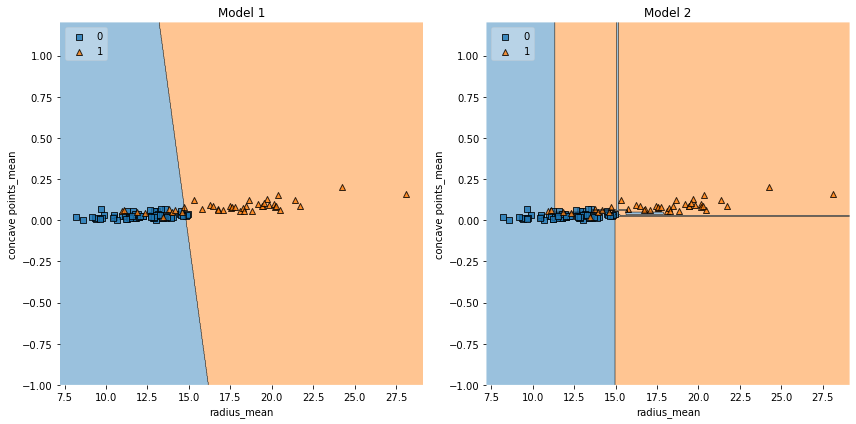

In [28]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

# Growing a classification tree

 you saw that the growth of an unconstrained classification tree followed a few simple rules. Which are true?

- The existence of a node depends on the state of its predecessors.
- The impurity of a node can be determined using different criteria such as entropy and the gini-index.
- When the information gain resulting from splitting a node is null, the node is declared as a leaf.

# Using entropy as a criterion

In this exercise, you'll train a classification tree on the Wisconsin Breast Cancer dataset using entropy as an information criterion. You'll do so using all the 30 features in the dataset, which is split into 80% train and 20% test.

In [29]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

# Entropy vs Gini index

 you'll compare the test set accuracy of `dt_entropy` to the accuracy of another tree named `dt_gini`. The tree `dt_gini` was trained on the same dataset using the same parameters except for the information criterion which was set to the gini index using the keyword '`gini`'

In [30]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=1)

# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [31]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred_entropy= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

# Use dt_entropy to predict test set labels
y_pred_gini= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Print accuracy_entropy
print(f'Accuracy achieved by using entropy: {accuracy_entropy:.3f}')

# Print accuracy_gini
print(f'Accuracy achieved by using the gini index: {accuracy_gini:.3f}')

Accuracy achieved by using entropy: 0.886
Accuracy achieved by using the gini index: 0.921


# Train your first regression tree

In this exercise, you'll train a regression tree to predict the `mpg` (miles per gallon) consumption of cars in the auto-mpg dataset using all the six available features.

In [46]:
import seaborn as sns

# Load the mpg dataset from seaborn
mpg = pd.read_csv("dataset/auto.csv")
# Extract features and target variable
X = mpg.drop(["mpg","origin"], axis=1)  # Assuming "mpg" is the target variable
y = mpg["mpg"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
# print(X.head())
# print(y.head())

In [47]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

# Evaluate the regression tree

In this exercise, you will evaluate the test set performance of dt using the Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).

In [48]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE
import numpy as np

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = np.sqrt(mse_dt)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.37


# Linear regression vs regression tree

you'll compare the test set RMSE of dt to that achieved by a linear regression model. We have already instantiated a linear regression model `lr` and trained it on the same dataset as `dt`.

In [49]:
# Import LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression

# Instantiate lr
lr = LinearRegression()

# Fit lr to the training set
lr.fit(X_train, y_train)

# Predict test set labels 
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr ** (1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 5.12
Regression Tree test set RMSE: 4.37
